# Simple Linear Regression of Salary Prediction

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split # creation of training and testing set
from sklearn.linear_model import LinearRegression # model
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("Salary_Data.csv")     # Import the CSV file & store in a variable called - data

In [7]:
data.head()         # See the first 5 entries from dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [10]:
data.shape

(30, 2)

There are 30 rows & 2 column in my dataset

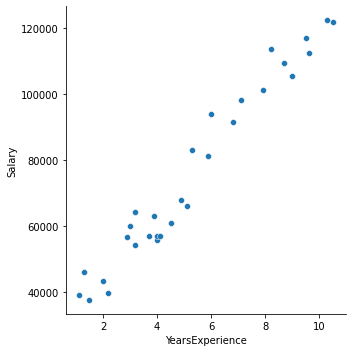

In [11]:
sns.relplot(x="YearsExperience",y="Salary",data=data)

This is just simple scatter plot of our data points & here we can see the nature of our dataset is Linear

In [17]:
y = data["Salary"]    # Dependent variable (That I want to predict)

x = data["YearsExperience"]    # Independant variable, it helps in prediction of Dependent variable

Here Dependent variable is - "Salary" & Independant variable is "YearsExperience" & he have split our data according to that & store in a variable "x" & "y"

In [18]:
y.shape # 1 D data

(30,)

In [27]:
x_matrix = x.values.reshape(-1,1) # converting data to 2-D , because sklearn required atleast 2 D data

In [69]:
# Splitting the dataset into training and test set.  

from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x_matrix, y, test_size= 0.3, random_state=0) 

Next, we will split both variables into the test set and training set. Here we will take 70% observations for the training set and 30% observations for the test set. We are splitting our dataset so that we can train our model using a training dataset and then test the model using a test dataset.

In [70]:
x_train

array([[ 7.9],
       [ 2.9],
       [ 5.1],
       [ 3.2],
       [ 4.5],
       [ 8.2],
       [ 6.8],
       [ 1.3],
       [10.5],
       [ 3. ],
       [ 2.2],
       [ 5.9],
       [ 6. ],
       [ 3.7],
       [ 3.2],
       [ 9. ],
       [ 2. ],
       [ 1.1],
       [ 7.1],
       [ 4.9],
       [ 4. ]])

In [71]:
x_test

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5],
       [ 8.7],
       [ 9.6],
       [ 4. ],
       [ 5.3]])

In [72]:
y_train

22    101302.0
5      56642.0
16     66029.0
8      64445.0
14     61111.0
23    113812.0
20     91738.0
1      46205.0
29    121872.0
6      60150.0
4      39891.0
18     81363.0
19     93940.0
9      57189.0
7      54445.0
25    105582.0
3      43525.0
0      39343.0
21     98273.0
15     67938.0
12     56957.0
Name: Salary, dtype: float64

In [73]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
27    112635.0
11     55794.0
17     83088.0
Name: Salary, dtype: float64

In [74]:
#Fitting the Simple Linear Regression model to the training dataset 

from sklearn.linear_model import LinearRegression  
lin_proj = LinearRegression()  
lin_proj.fit(x_train, y_train) 

LinearRegression()

In the above code we have used Imported Linear Regression to train our model , the reason behind for choosing Linear regression is that , our dataset has only 1 Dependent variable & 1 Independent variable .

In [75]:
#Prediction of Test and Training set result  
y_pred= lin_proj.predict(x_test)  
x_pred= lin_proj.predict(x_train)

In [76]:
y_pred

array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [77]:
x_pred

array([100723.45550213,  53922.14907116,  74514.72390079,  56730.22745702,
        68898.56712907, 103531.53388799,  90427.16808731,  38945.73101325,
       125060.13484623,  54858.17519978,  47369.96617082,  82002.93292974,
        82938.95905836,  61410.35810011,  56730.22745702, 111019.74291694,
        45497.91391358,  37073.67875601,  93235.24647317,  72642.67164355,
        64218.43648597])

# Test our Model

In [78]:
lin_proj.predict(np.array(15).reshape(-1,1)) 

array([167181.3106341])

In the above code , I have test my model by asking salary of person who has 15 years of experiance , & model is giving me a predicted Salary is about 167181

In [79]:
lin_proj.score(x_train,y_train)

0.9423777652193379

In [80]:
lin_proj.score(x_test,y_test)

0.9740993407213511

The above score tells that our model is 94% accurate with the training dataset and 97% accurate with the test dataset.

In [85]:
all_pred = lin_proj.predict(x_matrix)    # Predicted for all values

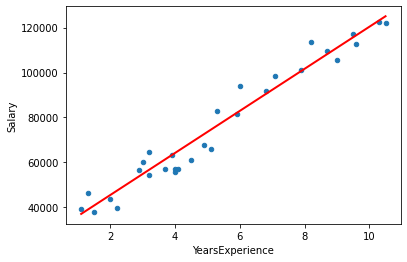

In [86]:
data.plot(kind="scatter",x="YearsExperience",y="Salary") # scatter plot
plt.plot(x,all_pred,c="red",linewidth=2) # drawing the best fit line

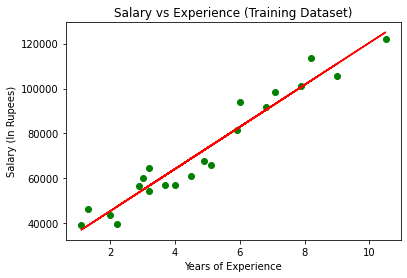

In [88]:
#visualizing the Train set results 

plt.scatter(x_train, y_train, color="green")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Training Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary (In Rupees)")  
plt.show() 

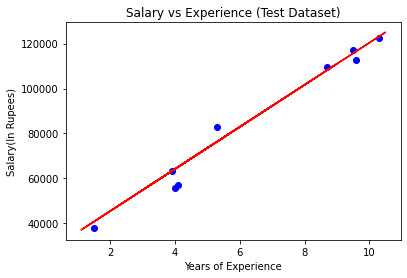

In [89]:
#visualizing the Test set results  

plt.scatter(x_test, y_test, color="blue")   
plt.plot(x_train, x_pred, color="red")    
plt.title("Salary vs Experience (Test Dataset)")  
plt.xlabel("Years of Experience")  
plt.ylabel("Salary(In Rupees)")  
plt.show() 

In [97]:
from sklearn.metrics import mean_squared_error

mse=mean_squared_error(y_train,x_train)

In [98]:
mse

5859674532.540477

In [99]:
mse_test=mean_squared_error(y_test,y_pred)     # calculated for testing mse value

In [100]:
mse_test

23370078.800832972

In [101]:
from math import sqrt 

In [102]:
rms_test = sqrt(mse_test)  # calculated for testing rms_test value
rms_test

4834.260936361728

In [103]:
import pickle as pk     # to save the model

In [105]:
filename = "linear_proj.pk"

pk.dump(lin_proj,open(filename,"wb"))     # wb = write binaries